<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>


## Import the required libraries


In [2]:
# General imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Regression imports 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import RFE

## Importing and understanding the Dataset


In [21]:
# Training Data 
train_data = pd.read_csv("files/train.csv")

# Prediction data 
prediction_data = pd.read_csv("files/test.csv")

In [4]:
# Checking the columns of the data 
print(train_data.columns)


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# About the Data


### **Main Objective**: The main objective of my model will be to predict sales price given varying house attributes. 

### **Data set**: The data set I chose is the House Prices Data set. 

# EDA

### UnderStanding Data 

In [4]:
print(train_data.head().to_string())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0   1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub    Inside   

In [8]:
print(train_data.shape) # 81 columns and 1460 rows 

(1460, 81)


In [10]:
print(train_data.describe().to_string())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold       YrSold      SalePrice
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000 

### Target Variable Exploration 

<Axes: xlabel='SalePrice', ylabel='Count'>

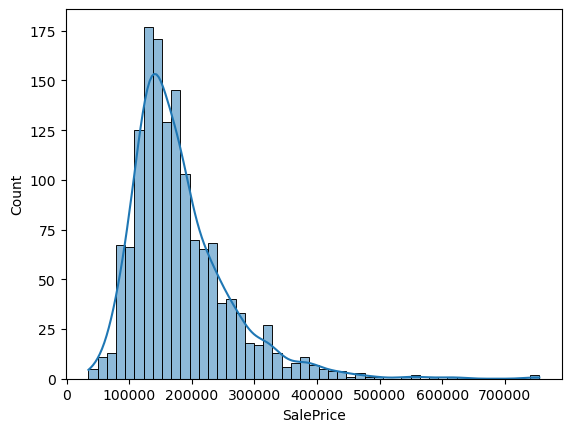

In [13]:
sns.histplot(train_data['SalePrice'], kde=True) # Distribution is skewed to the right

### Missing Values 

In [14]:
# Check for missing values
missing_values = train_data.isnull().sum()
print(missing_values[missing_values > 0])

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


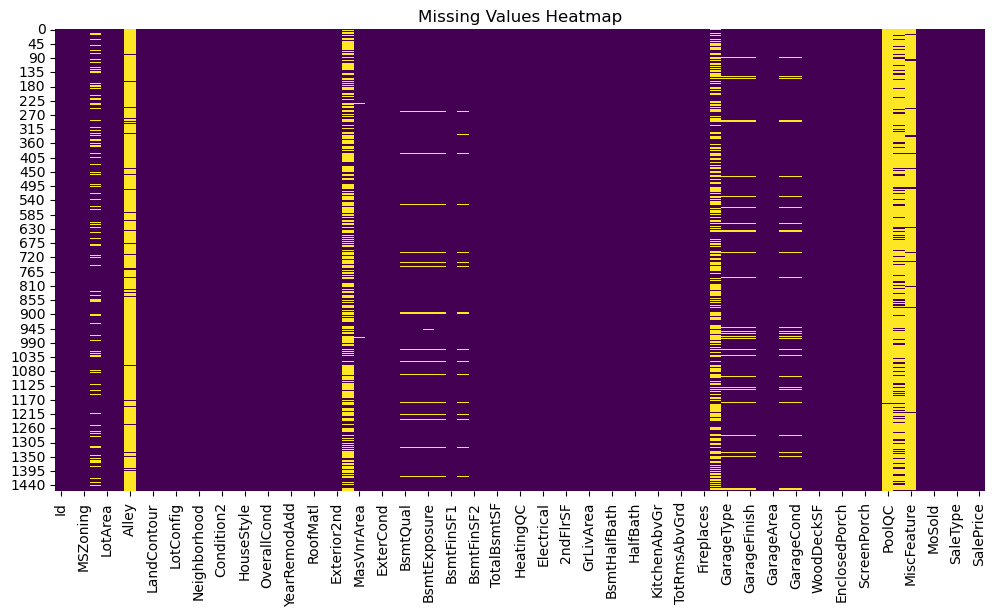

In [15]:
# Heatmap of missing values
plt.figure(figsize=(12, 6))
sns.heatmap(train_data.isna(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

### Data Preperation

Luckily for me, the data was relatively clean. The main focus of my cleaning process was handling NA values. Initially, I considered simply removing the columns with NA values, as they did not seem to serve a purpose. However, as I became more familiar with the data, I realized that the NA values indicated that a specific value or metric was unavailable. This meant that they did have significance. Therefore, I decided to replace all NA values in categorical columns with "Unavailable" and NA values in numerical columns with 0.

In [22]:
# Helper function to display first few rows and datatype of a column
def printr(column):
    print(train_data[column].head())
    print(train_data[column].dtype)
    print(train_data[column].unique())

In [23]:
# Handle categorical NA values
cat_val_replace = ["MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", 
                   "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", 
                   "GarageFinish", "GarageQual", "GarageCond", "PoolQC", 
                   "Fence", "MiscFeature", "Alley", "Electrical"]
train_data[cat_val_replace] = train_data[cat_val_replace].fillna("Unavailable")

# Handle numerical NA values
num_val_replace = ["MasVnrArea", "LotFrontage"]
train_data[num_val_replace] = train_data[num_val_replace].fillna(0)

# Handle GarageYrBlt
train_data["GarageYrBlt"] = train_data["GarageYrBlt"].fillna(train_data["GarageYrBlt"].median())

In [24]:
# Do this once data is fully clean and all N/A are taken care of 

# Getting Cat columns
catColumns = train_data.select_dtypes(include=['object']).columns

# Getting numerica columns
numericalColumns = train_data.select_dtypes(include = ["float", "int"]).columns

# Getting dummy variables 
train_data = pd.get_dummies(train_data, columns=catColumns, drop_first=True)

### Numerical Features 

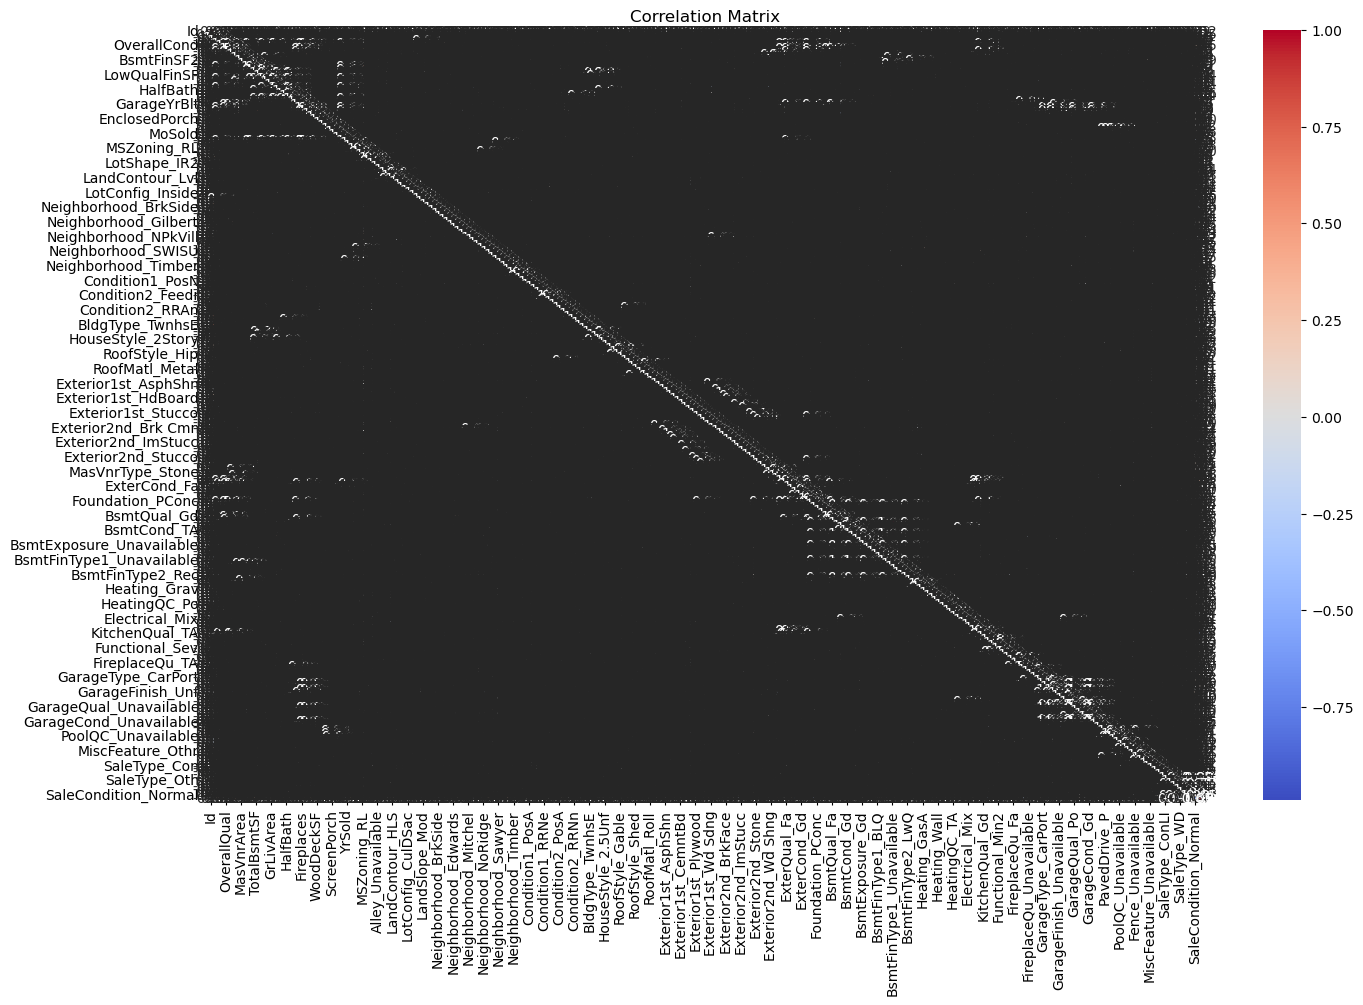

In [25]:
# Correlation matrix
corr_matrix = train_data.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Pairplot of numerical features
numerical_features = train_data.select_dtypes(include=['int64', 'float64']).columns
sns.pairplot(train_data[numerical_features])
plt.show()

In [31]:
# Boxplot of SalePrice vs. categorical features
categorical_features = train_data.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=train_data[feature], y=train_data['SalePrice'])
    plt.title(f'SalePrice vs. {feature}')
    plt.xticks(rotation=45)
    plt.show()

# Regression Models


In [13]:
# Helper function to print scores 
def print_scores(model, x_train, y_train, x_test, y_test):
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    train_mse = mean_squared_error(y_train, model.predict(x_train))
    test_mse = mean_squared_error(y_test, model.predict(x_test))
    
    print(f"Training Score: {train_score:.4f}")
    print(f"Test Score: {test_score:.4f}")
    print(f"Training Mean Squared Error: {train_mse:.4f}")
    print(f"Test Mean Squared Error: {test_mse:.4f}")
    print("\n")

In [14]:
# X and y
X = train_data.drop("SalePrice", axis=1) # Removing SalesPrice from X
y = train_data["SalePrice"]

# Train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42)

In [ ]:
# Model 
lr = LinearRegression()

#### Starting of with a simple linear regression model, to get an idea of what would need to be done

In [15]:
# Simple linear regression
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print_scores(lr, X_train, y_train, X_test, y_test)



Training Score: 0.9401
Test Score: 0.1006
Training Mean Squared Error: 357329540.6829
Test Mean Squared Error: 6898623426.1155





A high training score and a low test score indicates overfitting - meaning the linear model is too complex for the data, which if you think about, is rather unlikely for a linear model. So it is likely that this is not an overfitting problem
It could be that the training data is not representative of the test data. - We can try a differnt split with a shuffle

### Alternate split of the linear model

In [53]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = .2, random_state=41, shuffle=True)

In [57]:
lr.fit(X_train2, y_train2)
y_pred = lr.predict(X_test2)
print_scores(lr, X_train2, y_train2, X_test2, y_test2)

Training Score: 0.9389
Test Score: -1.0033
Training Mean Squared Error: 400422009.0799
Test Mean Squared Error: 10684164696.1247




### Trying a polynomial Regression

In [16]:
# Polynomial Regression 

poly = PolynomialFeatures(degree = 2)

lr = LinearRegression()

poly_X_train = poly.fit_transform(X_train)
poly_X_test = poly.transform(X_test)

lr.fit(poly_X_train, y_train)

y_pred = lr.predict(poly_X_test)

print_scores(lr, poly_X_train, y_train, poly_X_test, y_test)

Training Score: 1.0000
Test Score: 0.1542
Training Mean Squared Error: 0.0000
Test Mean Squared Error: 6487863770.2666




### Lasso Regression

In [17]:

poly = PolynomialFeatures(degree=2)

# Required for Lasso 
scaler = StandardScaler()

# transforming the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Lasso
lasso = Lasso(alpha = 2)
lasso.fit(X_train_poly, y_train)

# Prediction 
y_pred = lasso.predict(X_test_poly)

# Scores 
print_scores(lasso, X_train_poly, y_train, X_test_poly, y_test)

# Takes a little over 20 seconds to run

Training Score: 1.0000
Test Score: 0.8130
Training Mean Squared Error: 18940.2498
Test Mean Squared Error: 1434367342.0282




/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.211e+09, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(


### Hypertuning for best perfromance 

In [ ]:
# Linear Regression with Polynomial and StandardScaler

pipe = Pipeline([
   # ("poly", PolynomialFeatures(degree=2)),
    ("ss", StandardScaler()),
    ("lasso", LassoCV(cv = 5, random_state = 42, alphas = [.1, 1, 10, 100]) )
])

# Fitting the model 
pipe.fit(X_train, y_train)

# Getting the best alpha
best_alpha = pipe.named_steps["lasso"].alpha_
print(best_alpha)

# Model training will take a little under 10 min
# Grid search took too long

# Time with 4 alphas 

In [59]:
# Testing on test data 
y_pred = pipe.predict(X_test)
print_scores(pipe, X_train, y_train, X_test, y_test)


Training Score: 0.9385
Test Score: 0.8283
Training Mean Squared Error: 367030021.1736
Test Mean Squared Error: 1317073499.5113




### Prediction

In [39]:
def predict(df, pipe, reference):
    """
        This function is used o get the data used in predictions 
        in an appropiare format, then predict 

        df: The data we want to predict 
        pipe: The model pipeline, which includes the tranformatins, scalng and model 
        refernce: A refernce data to make sure prediction data is valid 
    """

    # Making sales Id Dataframe
    sale_id = df[["Id"]]

    # drop Id
    df = df.drop("Id", axis = 1)

    # Column subsect 
    catColumns = df.select_dtypes(include=['object']).columns
    
    # Num subsect

    numColumns = df.select_dtypes(include = ["float", "int"]).columns
    
    # Inpute na values in cat columns with "Unavailable"
    df[catColumns] = df[catColumns].fillna("Unavailable")

    # Inpute na values in num columns with 0
    df[numColumns] = df[numColumns].fillna(0)

    # Handle GarageYrBlt
    #df["GarageYrBlt"] = df["GarageYrBlt"].fillna(df["GarageYrBlt"].median())


    # testing 
    print(df.isna().sum().to_string())


    # remove na rows if any are left
    df = df.dropna()

    # Gett dummy variables 
    catColumns = df.select_dtypes(include=['object']).columns
    numericalColumns = df.select_dtypes(include = ["float", "int"]).columns
    df = pd.get_dummies(df, columns=catColumns, drop_first=True)

    # Making sure df is in the correct format
    missing_cols = set(reference.columns) - set(df.columns)
    for col in missing_cols:
        df[col] = 0

    df = df[reference.columns] # Reorder 

    # Prediction 
    predictions = pipe.predict(df) # scales and tranforms 

    results = pd.DataFrame({
        "Id" : sale_id.iloc[:, 0],
        "SalePrice" : predictions
    })

    return results

In [20]:
print(type(X_train))
print(type(X))
print(X.columns)

<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=261)


In [21]:
print(prediction_data.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [60]:
result = predict(prediction_data, pipe, X)

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [61]:
print(result)

        Id     SalePrice
0     1461  1.413415e+08
1     1462  1.743723e+08
2     1463  1.781816e+08
3     1464  1.481407e+08
4     1465  1.007632e+08
...    ...           ...
1454  2915  6.792720e+07
1455  2916  7.013157e+07
1456  2917  2.177232e+08
1457  2918  1.301438e+08
1458  2919  1.580881e+08

[1459 rows x 2 columns]


In [ ]:
# score 

print(pipe.score())

# Model process 

### **Training**
1. Simple Linear: Using the simple linear regression, was ofcourse the first start, to get an idea of the fit of the data, before moving to more complex models. 
2. Polynomial: I wanted to see if the addition of extar features via polnomial regression would improve the simple model, and it did. Although this introduces more features, the hope is for lasso regression to remove the newly introduced features that do not add much 
3. Lasso: I eventually landed on lasso regression, mainly due to the fact that we have a lot of features that add little to no value to the model. By getting rid of them, the model performance should imporove, hence why I choose lasso regression

### **Best Model**: Lasso
I ended up choosing the lasso model as it gave me the best scores. It ability to remove the need to certain columns allows the model to only focus on thos features that actually matter. 

# Insights and key findings


# Next Steps


In [ ]:
# questions to ask ai 

# How do i detemrine which columns have the highest impact on the model? 

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
